In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
dataframe_2=pd.read_excel("anel.xlsx",index_col=1)
dataframe_2=dataframe_2.drop(["SRNO"],axis=1)
dataframe_2.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D


In [3]:
dataframe_2=pd.read_excel("anel.xlsx",index_col=1)
dataframe_2=dataframe_2.drop(["SRNO"],axis=1)
dataframe_2.head()


,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D


In [4]:
dataframe_1=pd.read_excel("anel.xlsx",index_col=1)
dataframe_1=dataframe_1.drop(["SRNO"],axis=1)
dataframe_1.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D


In [5]:
dataframe_1[dataframe_1.index.duplicated()]

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,


In [6]:
dataframe_1.tail()


,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,
17UEC142,MS YUKTI MITTAL,16.25,22,19.0,57.25,B
17UEC143,ADITYA RAJ,20.50,25,20.0,65.50,AB
17UEC144,HARSHIT CHITTORA,18.50,13,19.0,50.50,BC
17UEC145,MEHUL MEHTA,15.25,17,22.0,54.25,B
17UEC146,YASH MAHESHWARI,21.75,22,18.0,61.75,AB


In [7]:
dataframe_1.isnull().sum()
#here we check for the null values in the dataframe

STUDENT NAME    0
Quizzes         0
mid Term        0
end Term        1
total(100)      0
grade           0
dtype: int64

In [8]:
dataframe_1=dataframe_1.rename(index=str, columns={"Quizzes\n":"Quiz_agg","mid Term\n":"MidTerm_agg","end Term\n":"EndTerm_agg","End_Term_Full\n":"End_Term_Full","total(100)\n":"Total_Agg"})
dataframe_1.columns.values

array([u'STUDENT NAME', u'Quizzes', u'mid Term', u'end Term',
       u'total(100)', u'grade'], dtype=object)

In [9]:
dataframe_1.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade
ROLLNO,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D


In [10]:
final_df=dataframe_1.copy()

In [11]:
final_df['end Term'].isnull().values.any()

True

In [12]:
#to find the null values in the dataframe which values are the null values in the dataframe
print(final_df[final_df.isnull().any(axis=1)].head())

          STUDENT NAME  Quizzes  mid Term  end Term  total(100) grade
ROLLNO                                                               
17UEC127  SUMEDHA RANA    10.75         6       NaN       16.75     I


In [13]:
final_df.loc["17UEC127",'end Term']=0

In [14]:
final_df.isnull().sum()


STUDENT NAME    0
Quizzes         0
mid Term        0
end Term        0
total(100)      0
grade           0
dtype: int64

In [15]:
a=[]
for lab,rows in final_df.iterrows():
    a.append(lab[2:5])
final_df['Branch']=a

In [16]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,Branch
ROLLNO,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,UCC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,DEC
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,DEC
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,DEC
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,DEC


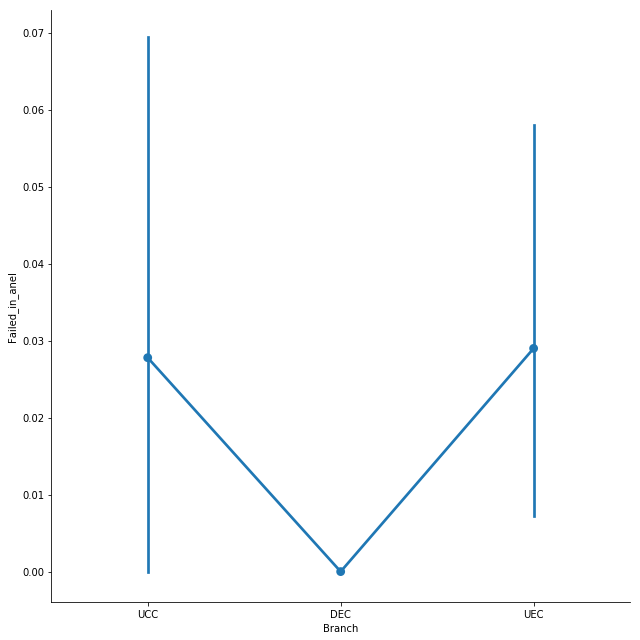

In [17]:
final_df['Failed_in_anel']=np.where(final_df['grade']=='F',1,0)
ax=sns.factorplot('Branch','Failed_in_anel',data=final_df,size=9)
plt.show()

In [18]:
pd.crosstab(final_df['Failed_in_anel'],final_df['Branch'])

Branch,DEC,UCC,UEC
Failed_in_anel,,,
0,7,70,134
1,0,2,4


In [19]:
final_df.groupby('Branch').mean()

,Quizzes,mid Term,end Term,total(100),Failed_in_anel
Branch,,,,,
DEC,12.642857,11.142857,12.428571,36.214286,0.000000
UCC,13.621528,14.680556,16.638889,44.940972,0.027778
UEC,15.610507,16.528986,16.268116,48.407609,0.028986


In [20]:
#the data shows about the averages of the different brach students in different areas
#we can also do
final_df.groupby('Branch').median()

,Quizzes,mid Term,end Term,total(100),Failed_in_anel
Branch,,,,,
DEC,12.50,10.0,12.0,29.75,0
UCC,13.25,14.5,16.0,44.75,0
UEC,15.25,17.0,16.5,49.00,0


In [21]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,Branch,Failed_in_anel
ROLLNO,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,UCC,0
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,DEC,0
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,DEC,0
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,DEC,0
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,DEC,0


In [22]:
final_df.describe()

,Quizzes,mid Term,end Term,total(100),Failed_in_anel
count,217.000000,217.000000,217.000000,217.000000,217.000000
mean,14.854839,15.741935,16.267281,46.864055,0.027650
std,4.778328,6.667204,6.853121,15.031351,0.164346
min,1.750000,0.000000,0.000000,5.250000,0.000000
25%,11.750000,10.000000,12.000000,36.000000,0.000000
50%,14.500000,16.000000,16.000000,47.250000,0.000000
75%,17.750000,21.000000,20.000000,58.250000,0.000000
max,28.750000,29.000000,43.000000,86.750000,1.000000


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 14UCC040 to 17UEC146
Data columns (total 8 columns):
STUDENT NAME      217 non-null object
Quizzes           217 non-null float64
mid Term          217 non-null int64
end Term          217 non-null float64
total(100)        217 non-null float64
grade             217 non-null object
Branch            217 non-null object
Failed_in_anel    217 non-null int32
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 24.4+ KB


In [24]:
def conv(a):
    listf=[]
    if(a=="F"):
        return(0)
    elif(a=="D"):
        return(1)
    elif(a=="CD"):
        return(2)
    elif(a=="C"):
        return(3)
    elif(a=="BC"):
        return(4)
    elif(a=="B"):
        return(5)
    elif(a=="AB"):
        return(6)
    else:
        return(7)
final_df['anel_grade_cov']=[conv(a) for a in final_df['grade']]

In [25]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,Branch,Failed_in_anel,anel_grade_cov
ROLLNO,,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,UCC,0,4
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,DEC,0,3
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,DEC,0,1
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,DEC,0,2
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,DEC,0,1


In [26]:
print(final_df.columns.values)

[u'STUDENT NAME' u'Quizzes' u'mid Term' u'end Term' u'total(100)' u'grade'
 'Branch' 'Failed_in_anel' 'anel_grade_cov']


In [27]:
def convB(a):
    if(a=="UCC"):
        return(2)
    elif(a=="UEC"):
        return(1)
    else:
        return(0)
final_df['Branch_cov']=[convB(a) for a in final_df['Branch']]

In [28]:
Pred_df=final_df[["mid Term","end Term","Quizzes","Branch_cov","total(100)","anel_grade_cov"]]

In [29]:
Pred_df.head()

,mid Term,end Term,Quizzes,Branch_cov,total(100),anel_grade_cov
ROLLNO,,,,,,
14UCC040,19,15.0,15.75,2,49.75,4
17DEC001,18,13.0,12.50,0,43.50,3
17DEC002,7,11.0,8.00,0,26.00,1
17DEC004,10,12.0,13.50,0,35.50,2
17DEC005,7,8.0,12.25,0,27.25,1


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Pred_df, test_size=0.2, random_state=42)

In [32]:
train_set.head()

,mid Term,end Term,Quizzes,Branch_cov,total(100),anel_grade_cov
ROLLNO,,,,,,
17UEC006,6,7.0,15.75,1,28.75,1
17UEC018,24,18.0,18.25,1,60.25,6
17UEC062,21,18.0,19.25,1,58.25,5
17UEC142,22,19.0,16.25,1,57.25,5
17UEC008,5,16.0,12.50,1,33.50,2


In [33]:
corr_matrix = Pred_df.corr()
corr_matrix["anel_grade_cov"].sort_values(ascending=False)

anel_grade_cov    1.000000
total(100)        0.947159
mid Term          0.855721
end Term          0.779123
Quizzes           0.668096
Branch_cov       -0.027142
Name: anel_grade_cov, dtype: float64

In [34]:
Train_X=train_set.drop(["end Term","anel_grade_cov","total(100)"],axis=1)
Train_X.head()

,mid Term,Quizzes,Branch_cov
ROLLNO,,,
17UEC006,6,15.75,1
17UEC018,24,18.25,1
17UEC062,21,19.25,1
17UEC142,22,16.25,1
17UEC008,5,12.50,1


In [35]:
Train_Y_Mark = train_set["end Term"].copy()

In [36]:
Train_Y_FMark = train_set["total(100)"].copy()

In [37]:
Train_Y = train_set["anel_grade_cov"].copy()

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(Train_X,Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",lin_reg.predict(some_data))

('Predictions:\t', array([5.7151639 , 1.80823119, 7.15135434, 2.86709014, 2.9903583 ,
       5.11581736, 2.20352806, 3.10222342]))


In [41]:
print("Labels\t\t",list(some_labels))

('Labels\t\t', [6L, 2L, 7L, 3L, 3L, 5L, 2L, 3L])


In [42]:
Train_Y.head()

ROLLNO
17UEC006    1
17UEC018    6
17UEC062    5
17UEC142    5
17UEC008    2
Name: anel_grade_cov, dtype: int64

In [43]:
Train_X.head()

,mid Term,Quizzes,Branch_cov
ROLLNO,,,
17UEC006,6,15.75,1
17UEC018,24,18.25,1
17UEC062,21,19.25,1
17UEC142,22,16.25,1
17UEC008,5,12.50,1


In [44]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = lin_reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




0.767097795939895

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Train_X,Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
Grade_predictions = tree_reg.predict(Test_X)
tree_mse = mean_squared_error(Test_Y, Grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8393720596645177

In [47]:
#error is more than our previous model may be this is because overfitting
#we can use cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.262854817411934

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Train_X,Train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
scores = cross_val_score(forest_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.0122922661135356

In [50]:
#error is more than the linear regression
#it is time to try a new model of svm regressor
from sklearn.svm import SVR
svm_reg=SVR(C=1.0,epsilon=0.2)
svm_reg.fit(Train_X,Train_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
scores = cross_val_score(svm_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.285544669397379

In [52]:
#it also has more error than svm calssifier than do the final test on the test set
Grade_predictions = svm_reg.predict(Test_X)
svm_mse = mean_squared_error(Test_Y, Grade_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1.3704795524468683

In [53]:
Grade_predictions = forest_reg.predict(Test_X)
forest_mse = mean_squared_error(Test_Y, Grade_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.7813159063109784

In [54]:
from sklearn import linear_model
clf = linear_model.SGDRegressor()

In [55]:
clf.fit(Train_X, Train_Y)

C:\Users\Harsh\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [56]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",clf.predict(some_data))

('Predictions:\t', array([  61282.94007533,  320425.83649745,  508976.27833967,
           970.53678773, -120077.4895762 ,  486983.02197887,
        361973.51398388,  420213.55757202]))


In [57]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [58]:
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([6, 2, 7, 3, 3, 5, 2, 3], dtype=int64))


In [60]:
print("Labels\t\t",list(some_labels))

('Labels\t\t', [6L, 2L, 7L, 3L, 3L, 5L, 2L, 3L])


In [61]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = logreg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8918825850158447

In [62]:
logreg = linear_model.LogisticRegression(C=1e3)
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [63]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([6, 2, 7, 3, 3, 5, 2, 3], dtype=int64))


In [64]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = logreg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8918825850158447

In [65]:
logreg = linear_model.LogisticRegression(C=1e7)
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([6, 2, 7, 3, 3, 5, 2, 3], dtype=int64))


In [67]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = logreg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8918825850158447

In [68]:
reg = linear_model.Ridge (alpha = 10)
reg.fit(Train_X,Train_Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",reg.predict(some_data))

('Predictions:\t', array([5.72255624, 1.78846325, 7.12224923, 2.87856897, 3.00440023,
       5.0891651 , 2.18245783, 3.07899494]))


In [70]:
from sklearn.metrics import mean_squared_error
Grade_predictions = reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7664957130815069

In [71]:
Train_X1=train_set.drop(["anel_grade_cov"],axis=1)
Train_X1.head()

,mid Term,end Term,Quizzes,Branch_cov,total(100)
ROLLNO,,,,,
17UEC006,6,7.0,15.75,1,28.75
17UEC018,24,18.0,18.25,1,60.25
17UEC062,21,18.0,19.25,1,58.25
17UEC142,22,19.0,16.25,1,57.25
17UEC008,5,16.0,12.50,1,33.50


In [72]:
Train_Y = train_set["anel_grade_cov"].copy()

In [73]:
reg = linear_model.Ridge (alpha = 10)
reg.fit(Train_X1,Train_Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
some_data = Train_X1.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",reg.predict(some_data))

('Predictions:\t', array([5.84818479, 2.37138603, 7.56611023, 2.84574738, 3.45057277,
       5.07446493, 2.07809872, 3.17303708]))


In [75]:
Test_X1=test_set.drop(["anel_grade_cov"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = reg.predict(Test_X1)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4106515048328663